<a href="https://colab.research.google.com/github/msfalcon/MOHTAR786/blob/main/MOHTAR786.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODE:**

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


# **DATA PROCESSING**


In [38]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [18]:
#reading data

df=pd.read_csv("/content/drive/MyDrive/sample_data.csv")


In [19]:
#Displaying head of dataset

df.head()

,text,label
0,zucker fabrik,ft
1,Lebensmittel kommssionierung,ft
2,geländer biegen,mr
3,gebäudeausrüstung technische,ct
4,kürbiskernöl softgels,ft


**Data Cleaning**

In [20]:
# Check for null values in the entire DataFrame
null_values = df.isnull().sum()

print(null_values)

text       0
label    100
dtype: int64


In [22]:
#Cleaning Null Values
# Remove rows with null values
df = df.dropna()

In [23]:
#After Cleaning
null_values = df.isnull().sum()

print(null_values)

text     0
label    0
dtype: int64


In [24]:
#Checking for Duplicate Values
null_values = df.isnull().sum()

print(null_values)

text     0
label    0
dtype: int64


In [25]:
#Analyzing the Number of rows as and columns of dataset
df.shape

(37195, 2)

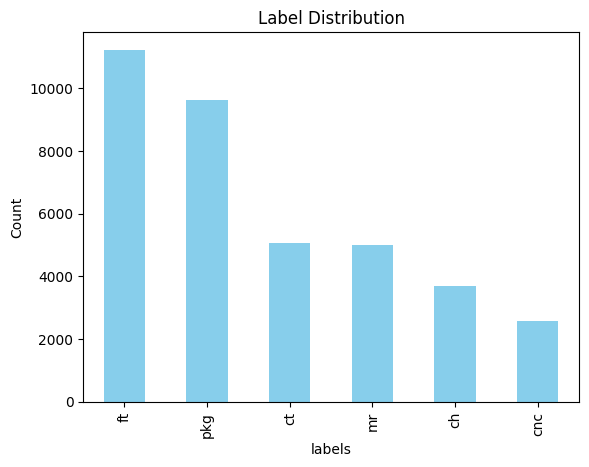

In [26]:
#Ploting barchart of the label Count

label_counts = df['label'].value_counts()
label_counts.plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('labels')
plt.ylabel('Count')
plt.show()

This Data Set is imbalanced

 **DATA SPLITTING**

In [30]:
#Splitting training and testing data

train_data, test_data, train_labels, test_labels = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [31]:
#Counting Training and testing examples

num_training_examples = len(train_data)
num_testing_examples = len(test_data)

print(f"Number of Training Samples: {num_training_examples}")
print(f"Number of Testing Samples: {num_testing_examples}")

Number of Training Samples: 29756
Number of Testing Samples: 7439


# **Feature Extraction**

In [32]:
#Importing
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
#Term Frequency - Inverse Document Frequency  || CountVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data)
X_test_tfidf = tfidf_vectorizer.transform(test_data)

# **Dealing With Imbalanced Data**

As the data is highly imbalaced we will use Smote to make it balanced

In [35]:
#Importing
from imblearn.over_sampling import SMOTE

In [36]:
#Resampling Using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, train_labels)


<ipython-input-39-9fe3755b1a4b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=resampled_df, palette='viridis')


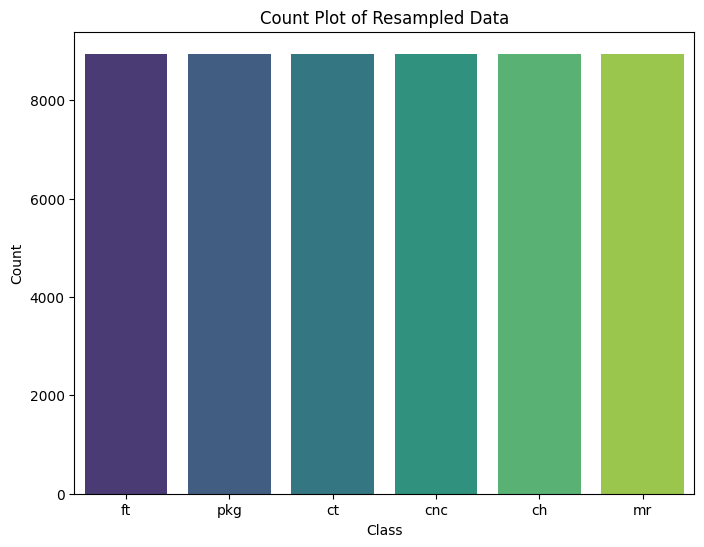

In [39]:
# Creating a DataFrame from the resampled data
resampled_df = pd.DataFrame({'text': X_resampled, 'label': y_resampled})

# Count plot of the resampled data
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=resampled_df, palette='viridis')
plt.title('Count Plot of Resampled Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Now our Data is Balanced

# **Building Model**

Making ML pipline  in classification model and then Stacking those classifiers

In [40]:
#Importing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Defining Individual Classifier

In [49]:
#using lbfgs
classifier1 = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs'))
#Using Radial Basis Function
classifier2 = make_pipeline(StandardScaler(with_mean=False), SVC(C=0.1, kernel='rbf', random_state=42))
classifier3 = DecisionTreeClassifier(random_state=42)

Stacking up these three classifiers

In [50]:
stacking_classifier = StackingClassifier(
    estimators=[('lr', classifier1), ('svm', classifier2), ('dt', classifier3)],final_estimator=LogisticRegression())

# ***TRAINING THE MODEL***

In [51]:
# Training the stacking classifier on the resampled data

stacking_classifier.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('lr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler(with_mean=False)),
                                                ('logisticregression',
                                                 LogisticRegression(max_iter=1000,
                                                                    random_state=42))])),
                               ('svm',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler(with_mean=False)),
                                                ('svc',
                                                 SVC(C=0.1,
                                                     random_state=42))])),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

Saving The model on Google Drive

In [53]:
from google.colab import drive
import joblib

# Mount Google Drive
drive.mount('/content/gdrive')

drive_path = '/content/gdrive/My Drive/'

# Save the model to Google Drive
joblib.dump(stacking_classifier, drive_path + 'stacking_classifier_model.joblib')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['/content/gdrive/My Drive/stacking_classifier_model.joblib']

# **Testing the Model**

In [54]:
predictions = stacking_classifier.predict(X_test_tfidf)

# **Perform Evaluation on the model**

In [55]:
#Importing
from sklearn.metrics import accuracy_score, classification_report

In [56]:
# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.7876058610028229
Classification Report:
               precision    recall  f1-score   support

          ch       0.43      0.91      0.59       706
         cnc       0.72      0.77      0.74       513
          ct       0.91      0.76      0.83      1022
          ft       0.94      0.78      0.85      2281
          mr       0.81      0.72      0.77      1009
         pkg       0.87      0.81      0.84      1908

    accuracy                           0.79      7439
   macro avg       0.78      0.79      0.77      7439
weighted avg       0.84      0.79      0.80      7439



Making Confusion Matrix

In [57]:
#Importing
from sklearn.metrics import confusion_matrix

In [58]:
conf_matrix = confusion_matrix(test_labels, predictions)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[ 641   16    3   16    6   24]
 [  39  397    5    5   39   28]
 [ 154   20  779   15   28   26]
 [ 350   30   15 1774   16   96]
 [ 120   67   29   10  728   55]
 [ 174   24   21   72   77 1540]]


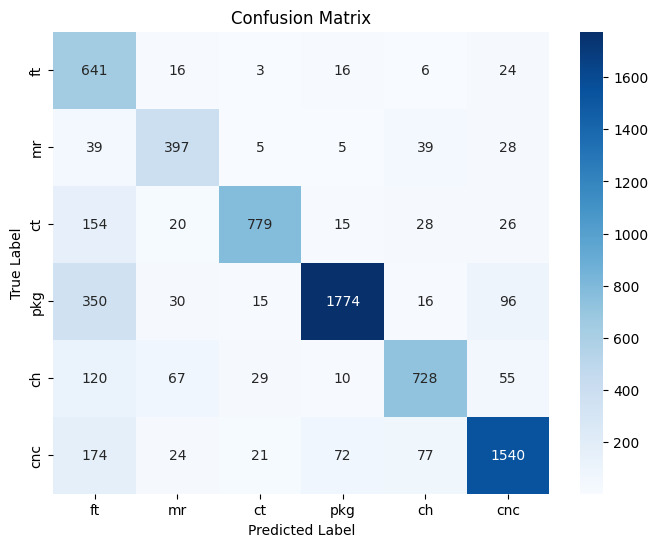

In [62]:
class_labels = df['label'].unique()

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()